In [33]:
import sys
import os

import tensorflow as tf
print('TensorFlow:{}'.format(tf.__version__))
import numpy as np
print('NumPy:{}'.format(np.__version__))
import pandas as pd
print("Pandas:{}".format(pd.__version__))

import matplotlib.pyplot as plt

current_path = os.getcwd()
base_dir = os.path.dirname(current_path)

if not base_dir in sys.path:
    sys.path.append(base_dir)

print(sys.path)

%reload_ext autoreload
%autoreload 2
import datasetslib

from datasetslib.ptb import PTBSimple
from datasetslib import util as dsu
from datasetslib import nputil

ptb = PTBSimple()
# 加载数据，将单词转换为ids，将文件转换为ids列表
ptb.load_data()

# 每个数据集前5个元素
print('Train:', ptb.part['train'][0:5])
print('Test: ', ptb.part['test'][0:5])
print('Valid:', ptb.part['valid'][0:5])
print('Vocabulary Length = ', ptb.vocab_len)

# 将上下文窗口设置为两个单词
ptb.skip_windows = 2
ptb.reset_index()

# 在CBOW中， 输入是上下文单词，输出是目标单词
y_batch, x_batch = ptb.next_batch_cbow()
print('The CBOW pairs: context, target')
for i in range(5 * ptb.skip_windows):
    print('(', [ptb.id2word[x_i] for x_i in x_batch[i]],
         ',', y_batch[i], ptb.id2word[y_batch[i]], ')')

    


TensorFlow:1.13.1
NumPy:1.16.3
Pandas:0.24.2
['c:\\python36\\python36.zip', 'c:\\python36\\DLLs', 'c:\\python36\\lib', 'c:\\python36', '', 'c:\\python36\\lib\\site-packages', 'c:\\python36\\lib\\site-packages\\pip-9.0.1-py3.6.egg', 'c:\\python36\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\WJ\\.ipython', 'D:\\Work\\tensorflow_test']
Already exists: ./datasets\ptb-simple\simple-examples.tgz
Train: [9970 9971 9972 9974 9975]
Test:  [102  14  24  32 752]
Valid: [1132   93  358    5  329]
Vocabulary Length =  10000
The CBOW pairs: context, target
( ['aer', 'berlitz'] , 9971 banknote )
( ['banknote', 'calloway'] , 9972 berlitz )
( ['berlitz', 'centrust'] , 9974 calloway )
( ['calloway', 'cluett'] , 9975 centrust )
( ['centrust', 'fromstein'] , 9976 cluett )
( ['cluett', 'gitano'] , 9980 fromstein )
( ['fromstein', 'guterman'] , 9981 gitano )
( ['gitano', 'hydro-quebec'] , 9982 guterman )
( ['guterman', 'ipo'] , 9983 hydro-quebec )
( ['hydro-quebec', 'kia'] , 9984 ipo )


In [34]:
ptb.skip_window = 2
ptb.reset_index()

# 在skip-gram中， 输入是目标单词,输出是上下文单词
x_batch, y_batch = ptb.next_batch_sg()
print('The skip-gram pairs: target, context')
for i in range(5 * ptb.skip_windows):
    print('(', x_batch[i], ptb.id2word[x_batch[i]],
         ',', y_batch[i], ptb.id2word[y_batch[i]], ')')

    

The skip-gram pairs: target, context
( 9972 berlitz , 9970 aer )
( 9972 berlitz , 9971 banknote )
( 9972 berlitz , 9974 calloway )
( 9972 berlitz , 9975 centrust )
( 9974 calloway , 9971 banknote )
( 9974 calloway , 9972 berlitz )
( 9974 calloway , 9975 centrust )
( 9974 calloway , 9976 cluett )
( 9975 centrust , 9972 berlitz )
( 9975 centrust , 9974 calloway )


In [10]:
from datasetslib.text8 import Text8

text8 = Text8()

# 加载数据，将单词转换为ids，将文件转换为ids列表
text8.load_data()

print('Train:', text8.part['train'][0:5])
print('Vocabulary Length = ', text8.vocab_len)



Downloading: http://mattmahoney.net/dc/text8.zip
Downloaded : ./datasets\text8\text8.zip ( 31344016 bytes)
Train: [5233 3083   11    5  194]
Vocabulary Length =  253854


In [35]:
# 将上下文窗口设置为两个单词
text8.skip_window = 2
text8.reset_index()

# # 在CBOW中， 输入是上下文单词，输出是目标单词
y_batch, x_batch = text8.next_batch_cbow()

print('The CBOW pairs: context, target')
for i in range(5 * text8.skip_window):
    print('(', [text8.id2word[x_i] for x_i in x_batch[i]],
         ',', y_batch[i], text8.id2word[y_batch[i]], ')')
    
    

The CBOW pairs: context, target
( ['anarchism', 'originated', 'a', 'term'] , 11 as )
( ['originated', 'as', 'term', 'of'] , 5 a )
( ['as', 'a', 'of', 'abuse'] , 194 term )
( ['a', 'term', 'abuse', 'first'] , 1 of )
( ['term', 'of', 'first', 'used'] , 3133 abuse )
( ['of', 'abuse', 'used', 'against'] , 45 first )
( ['abuse', 'first', 'against', 'early'] , 58 used )
( ['first', 'used', 'early', 'working'] , 155 against )
( ['used', 'against', 'working', 'class'] , 127 early )
( ['against', 'early', 'class', 'radicals'] , 741 working )


In [14]:
# 准备skip-gram对

# 将上下文窗口设置为两个单词
text8.skip_window = 2
text8.reset_index()

# 在skip-gram中， 输入是上下文单词，输出是目标单词
x_batch, y_batch = text8.next_batch_sg()

print('The skip-gram pairs: target, context')
for i in range(5 * text8.skip_window):
    print('(', x_batch[i], text8.id2word[x_batch[i]],
         ',', y_batch[i], text8.id2word[y_batch[i]], ')')
    
    

The skip-gram pairs: target, context
( 11 as , 5233 anarchism )
( 11 as , 3083 originated )
( 11 as , 5 a )
( 11 as , 194 term )
( 5 a , 3083 originated )
( 5 a , 11 as )
( 5 a , 194 term )
( 5 a , 1 of )
( 194 term , 11 as )
( 194 term , 5 a )


In [36]:
valid_size = 8
x_valid = np.random.choice(valid_size*10, valid_size, replace=False)
print(x_valid)

[71 65 61 54  9 51 44 50]


In [42]:
batch_size = 128
embedding_size = 128  # 每个单词对应的向量维度
skip_window = 2     # 上下文单词的数量
n_negative_samples = 64  # 由NCE损失函数生成的负样本数
ptb.skip_window = 2
learning_rate = 1.0


inputs = tf.placeholder(dtype=tf.int32, shape=[batch_size])
outputs = tf.placeholder(dtype=tf.int32, shape=[batch_size, 1])
inputs_valid = tf.constant(x_valid, dtype=tf.int32)

# 定义一个嵌入矩阵，其行数等于词汇长度，列等于嵌入维度
# 该矩阵的每一行便是词汇表中一个单词的词向量，使用在-1.0~1.0之间的均匀采样的值填充此矩阵

# 使用vocal_len行和embedding_size列定义嵌入矩阵
embed_dist = tf.random_uniform(shape=[ptb.vocab_len, embedding_size],
                              minval=-1.0, maxval=1.0 )
embed_matrix = tf.Variable(embed_dist, name='embed_matrix')

# 使用此矩阵定义一个嵌入查找表
# lookup返回inputs占位符中单词的词向量
# embed_ltable也可以解释为输入层顶部的嵌入层，将嵌入层的输出传递到softmax或噪声对比估计（Noise-Contrastive Estimation, NCE）层
embed_ltable = tf.nn.embedding_lookup(embed_matrix, inputs)

# 定义NCE损失函数
nce_dist = tf.truncated_normal(shape=[ptb.vocab_len, embedding_size],
                              stddev=1.0 / tf.sqrt(embedding_size*1.0))

nce_w = tf.Variable(nce_dist)
nce_b = tf.Variable(tf.zeros(shape=[ptb.vocab_len]))

# tf.nn.nce_loss()在计算损失值时会自动生成负样本
loss = tf.reduce_mean(tf.nn.nce_loss(weights=nce_w,
                                    biases=nce_b,
                                    inputs=embed_ltable,
                                    labels=outputs,
                                    num_sampled=n_negative_samples,
                                    num_classes=ptb.vocab_len)
                     )

# 计算验证样本与所有嵌入之间的余弦相似度
norm = tf.sqrt(tf.reduce_sum(tf.square(embed_matrix), 1, keep_dims=True))
normalized_embeddings = embed_matrix / norm

# 在验证集中查找样本的词向量
embed_valid = tf.nn.embedding_lookup(normalized_embeddings, inputs_valid)

# 将验证集的词向量与嵌入矩阵相乘来计算相似性分数
similarity = tf.matmul(embed_valid, normalized_embeddings, transpose_b=True)

n_epochs = 50
learning_rate = 0.9
n_batches = ptb.n_batches_wv()
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

with tf.Session() as tfs:
    tf.global_variables_initializer().run()
    for epoch in range(n_epochs):
        epoch_loss = 0
        ptb.reset_index()
        for step in range(n_batches):
            x_batch, y_batch = ptb.next_batch_sg()
            y_batch = nputil.to2d(y_batch, unit_axis=1)
            feed_dict = {inputs: x_batch, outputs: y_batch}
            _, batch_loss = tfs.run([optimizer, loss], feed_dict=feed_dict)
            epoch_loss += batch_loss
    
        epoch_loss = epoch_loss / n_batches
        print('\n', 'Average loss after epoch ', epoch, ': ', epoch_loss)

        similarity_scores = tfs.run(similarity)
        top_k = 5
        for i in range(valid_size):
            similar_words = (-similarity_scores[i, :]).argsort()[1:top_k + 1]
            similar_str = 'Similar to {0:}'.format(ptb.id2word[x_valid[i]])
            for k in range(top_k):
                similar_str = '{0:} {1:}'.format(similar_str, ptb.id2word[similar_words[k]])
            print(similar_str)
    final_embeddings = tfs.run(normalized_embeddings)
    
    


 Average loss after epoch  0 :  115.2247523527879
Similar to shares ind. mr. to bid computers
Similar to corp. circulation reported after still into
Similar to other default financial added cray touchy
Similar to one demand electric branch kong counts
Similar to 's with as october exports $
Similar to their about dodge too N imported
Similar to says they department approved raising n't
Similar to had he did its in million

 Average loss after epoch  1 :  48.088450202575096
Similar to shares label bid montedison import ind.
Similar to corp. circulation reported industrialized still after
Similar to other default touchy financial added downtown
Similar to one demand kong electric cigarettes however
Similar to 's october soul exports with bonds
Similar to their about too dodge neither illinois
Similar to says they approved department raising N
Similar to had he did million commerce tells

 Average loss after epoch  2 :  29.48644642952161
Similar to shares label bid import dreyfus montedi


 Average loss after epoch  17 :  3.680214152122155
Similar to shares label jr. free import dreyfus
Similar to corp. circulation advantages operations industrialized ran
Similar to other touchy default downtown <unk> well
Similar to one kong demand scientists cigarettes operate
Similar to 's wood bonds startling lesser eliminate
Similar to their too about illinois favored neither
Similar to says raising approved happen they department
Similar to had tells did hung typically plunged

 Average loss after epoch  18 :  3.7102109568241315
Similar to shares label jr. free import dreyfus
Similar to corp. circulation advantages ran industrialized operations
Similar to other touchy default downtown <unk> well
Similar to one kong demand scientists cigarettes operate
Similar to 's wood bonds startling eliminate lesser
Similar to their too favored illinois about neither
Similar to says raising approved happen department they
Similar to had tells did hung typically plunged

 Average loss after epoc


 Average loss after epoch  35 :  3.2469247671274037
Similar to shares label jr. free semiannual bid
Similar to corp. circulation advantages northeast operations ran
Similar to other touchy default downtown record well
Similar to one kong demand scientists cigarettes resigned
Similar to 's startling wood lesser bonds mass
Similar to their too illinois favored neither about
Similar to says raising happen foot approved type
Similar to had tells hung higher plunged did

 Average loss after epoch  36 :  3.2477274651710806
Similar to shares label jr. free semiannual bid
Similar to corp. circulation advantages northeast operations ran
Similar to other touchy default downtown record well
Similar to one kong demand scientists cigarettes resigned
Similar to 's wood startling lesser bonds mass
Similar to their too illinois favored neither about
Similar to says raising happen foot approved type
Similar to had tells hung higher plunged did

 Average loss after epoch  37 :  3.225645845517134
Simila

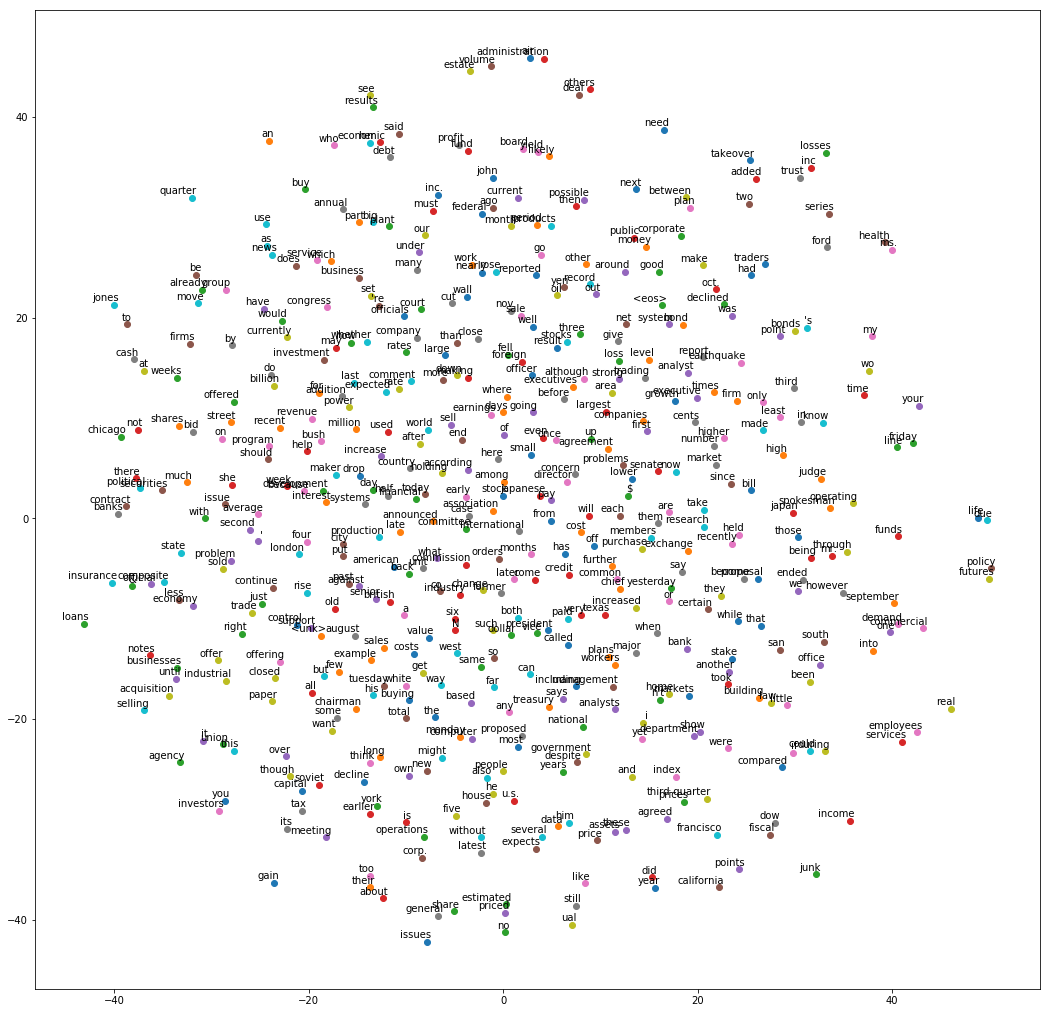

In [46]:
from sklearn.manifold import TSNE

def plot_with_labels(low_dim_embs, labels):
    assert low_dim_embs.shape[0] >= len(
        labels), 'More labels than embeddings'
    plt.figure(figsize=(18, 18))  # in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i, :]
        plt.scatter(x, y)
        plt.annotate(label,
                     xy=(x, y),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
    
tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000, method='exact')

n_embeddings = 500
low_dim_embeddings = tsne.fit_transform(final_embeddings[:n_embeddings, :])

labels = [ptb.id2word[i] for i in range(n_embeddings)]

plot_with_labels(low_dim_embeddings, labels)
